<a href="https://colab.research.google.com/github/yulianindahs27-rgb/Indah-s-Projects/blob/main/Kelompok_1_Diabetes_(70000)_Google_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA UNDERSTANDING

Dataset ini mencakup berbagai variabel yang berkaitan dengan faktor kesehatan dan gaya hidup, yang dapat digunakan untuk melakukan analisis kesehatan, seperti prediksi risiko penyakit (misalnya diabetes). Setiap variabel dalam dataset ini mewakili aspek penting dari kondisi fisik atau gaya hidup individu yang berpotensi mempengaruhi kesehatannya. Dengan menganalisis data ini, kita dapat menggali wawasan mendalam tentang bagaimana faktor-faktor tertentu berkontribusi terhadap perkembangan penyakit, mengenali pola atau tren yang tidak langsung terlihat, dan akhirnya membangun model prediksi yang dapat memberikan keputusan yang lebih baik bagi dokter dan peneliti kesehatan.

# Import Library

Kode ini mengimpor beberapa pustaka Python yang sering digunakan untuk analisis data.
* `pandas` digunakan untuk manipulasi dan analisis data dalam bentuk
tabel;
* `numpy` menyediakan dukungan untuk perhitungan numerik dan operasi array;
* `missingno` membantu memvisualisasikan data yang hilang dalam dataset;  
*`seaborn` dan `matplotlib.pyplot` digunakan untuk membuat grafik dan visualisasi data;
*Fungsi `warnings.filterwarnings('ignore')` menonaktifkan peringatan yang tidak penting selama menjalankan kode, sehingga hasil lebih bersih dan tidak terganggu oleh pesan peringatan.

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read Data

Kode ini membaca file Excel bernama **"diabetes_dataset00.xlsx"** ke dalam sebuah DataFrame `df` menggunakan fungsi `pd.read_excel()`. Setelah itu, `df.head()` digunakan untuk menampilkan lima baris pertama dari DataFrame tersebut, memungkinkan pengguna untuk melihat sekilas data yang ada di file tersebut.

Output yang dihasilkan menampilkan lima baris pertama dari data diabetes yang dimuat dari file Excel.
Terlihat bahwa indeks dimulai dari angka 0 hal ini dikarenakan dalam Python kompilator membutuhkan elemen dasar berupa 0 untuk memudahkan dalam menghitung rumus saat dilakukan operasi perhitungan.

In [ ]:
df = pd.read_excel("diabetes_dataset00.xlsx")
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


Kode `df.info()` memberikan informasi ringkas tentang struktur DataFrame. Dalam setiap analisis data, terutama klasifikasi ada beberapa istilah yang harus diketahui, seperti :
* `Column` yang bisa disebut variabel;
* `Baris` berupa jumlah sampel;
* `Fitur/ Atribut` maknanya adalah variabel X atau variabel yang menjelaskan target (variabel penjelas);
* `Target/ label` adalah penentuan kategori data.

Terlihat dari DataFrame, bahwa **33 dari 34 columnnya berupa fitur**, sedangkan sisanya, yaitu **column `Target` sebagai target** dalam DataFrame.

Tipe data ada yang berupa int64, float64, dan object.
* `int64` berupa data bilangan bulat dan seringkali digunakan untuk pengkategorian dalam bentuk angka dan untuk modelling, diperlukan transformasi data numerik;
* `object` berupa pengkategorian juga, namun dalam bentuk teks. Sehingga untuk melakukan modelling di akhir perlu dilakukan transformasi data kategorik.
* `float64` adalah tipe desimal dan bukan berupa pengkategorian, untuk modelling diperlukan transformasi data numerik.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

Berdasarkan output yang muncul:

- DataFrame memiliki **70000** baris dan **34 kolom**.
- Setiap kolom ditampilkan dengan jumlah nilai **non-null** (nilai yang tidak kosong) dan tipe data yang sesuai.
- Didapatkan int64 sebanyak 13, object sebanyak 21
- Total penggunaan memori DataFrame adalah **18.2+ MB**, yang memberikan gambaran tentang ukuran dataset di dalam memori.

Kode df.info() memberikan informasi ringkas tentang struktur DataFrame. Tipe data ada yang berupa int64, float64, dan object.



# Check Missing Values

Kode `msno.matrix(df)` digunakan untuk memvisualisasikan keberadaan data yang hilang (missing data) di dalam DataFrame `df`. Berdasarkan output yang ditunjukkan pada gambar, berikut adalah interpretasinya:

- Setiap kolom dari DataFrame diwakili oleh satu bar vertikal yang memperlihatkan distribusi data.
- **Warna hitam** menunjukkan data yang tersedia (non-null), sedangkan **garis putih** menunjukkan data yang hilang (missing values).
- Semua kolom berwarna hitam yang menandakan data tersedia.

Kode `msno.bar(df)` digunakan untuk membuat visualisasi batang yang menunjukkan jumlah data yang hilang (missing data) di setiap kolom dalam DataFrame `df`. Berikut adalah interpretasi dari output yang dihasilkan:

- Setiap kolom dalam DataFrame direpresentasikan oleh satu batang, di mana tinggi batang menunjukkan jumlah total entri dalam kolom tersebut.
- Batang yang berwarna hitam menunjukkan jumlah data yang tersedia (non-null) dengan angka di atasnya
- Dari visualisasi ini, kita dapat dengan mudah melihat kolom mana yang memiliki banyak data hilang.

Secara keseluruhan, grafik ini memberikan gambaran yang jelas tentang distribusi data yang hilang di seluruh kolom dalam DataFrame.

<Axes: >

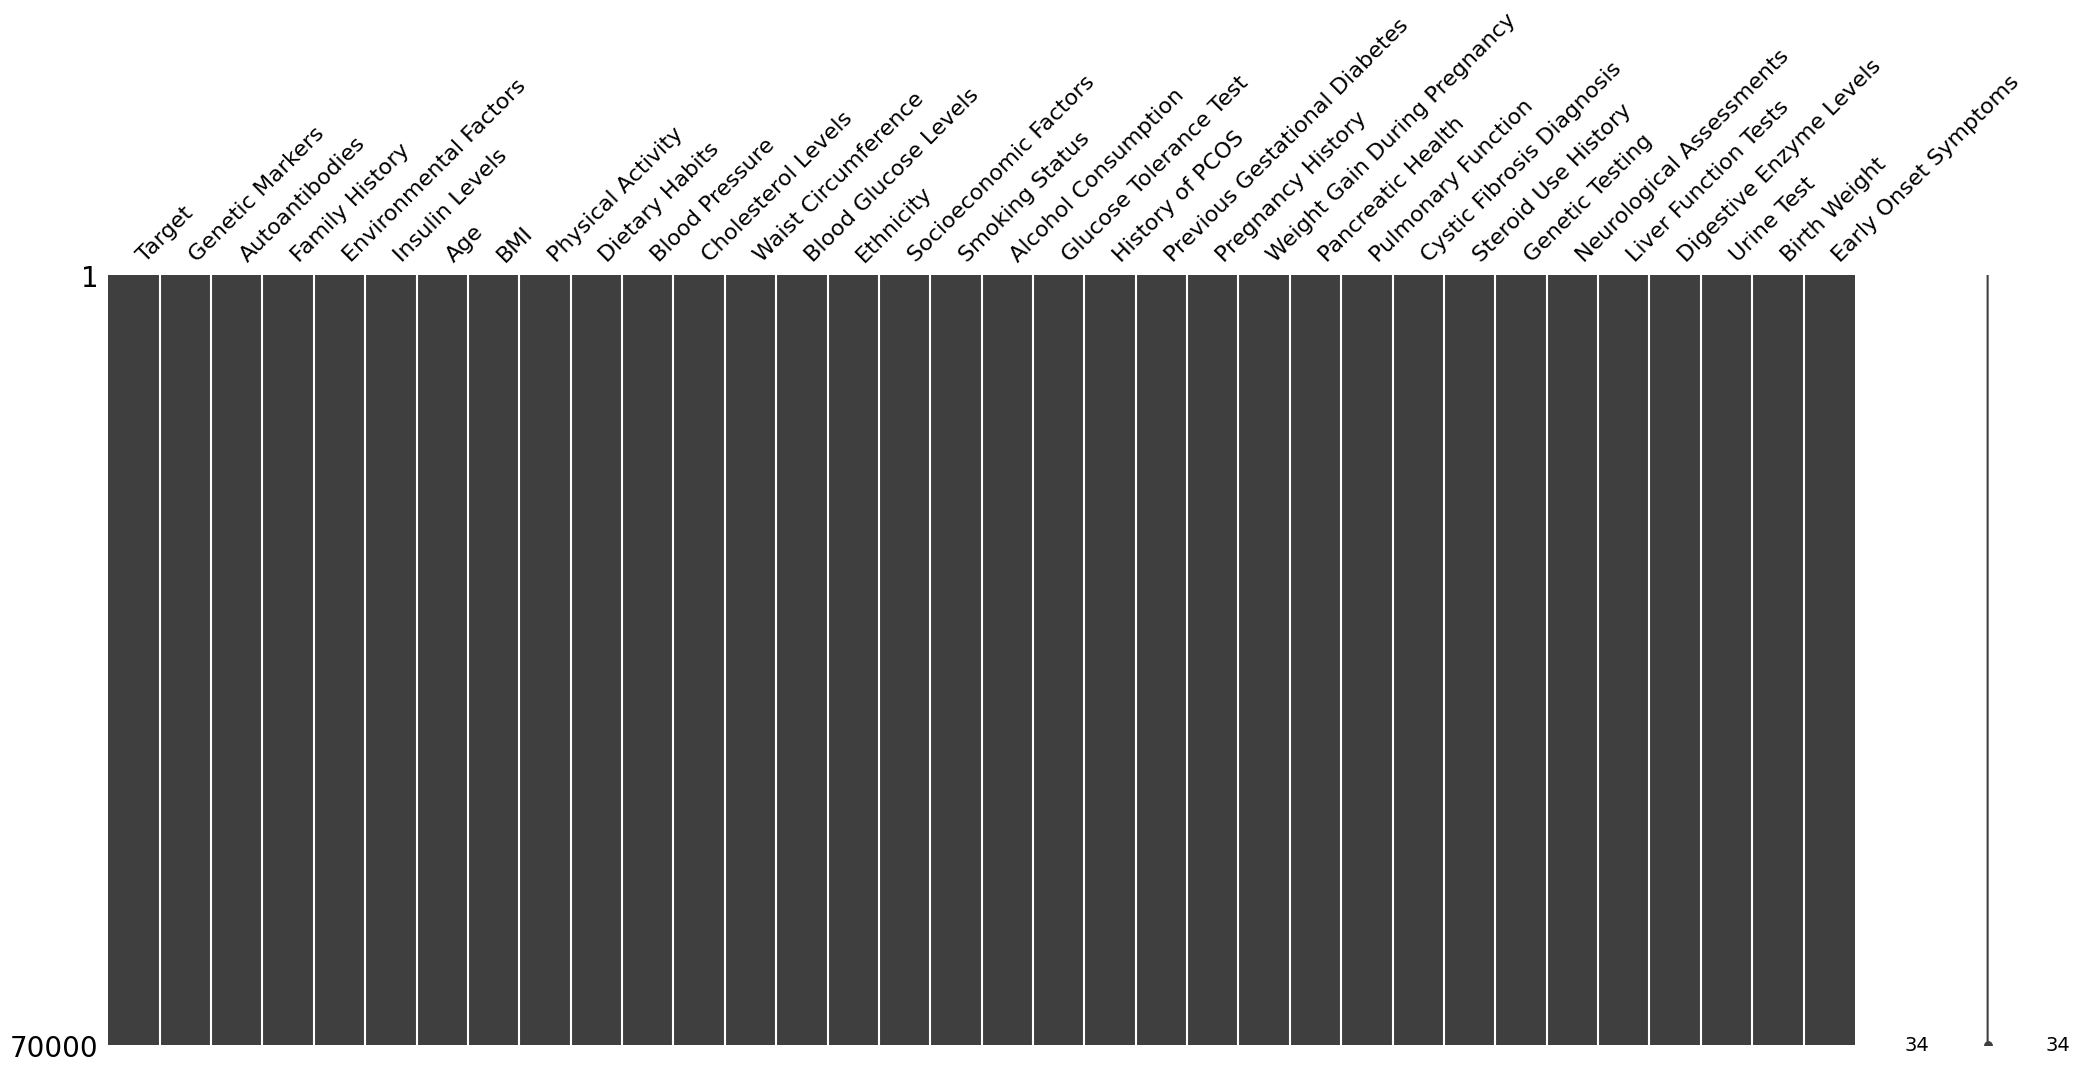

In [ ]:
msno.matrix(df)

<Axes: >

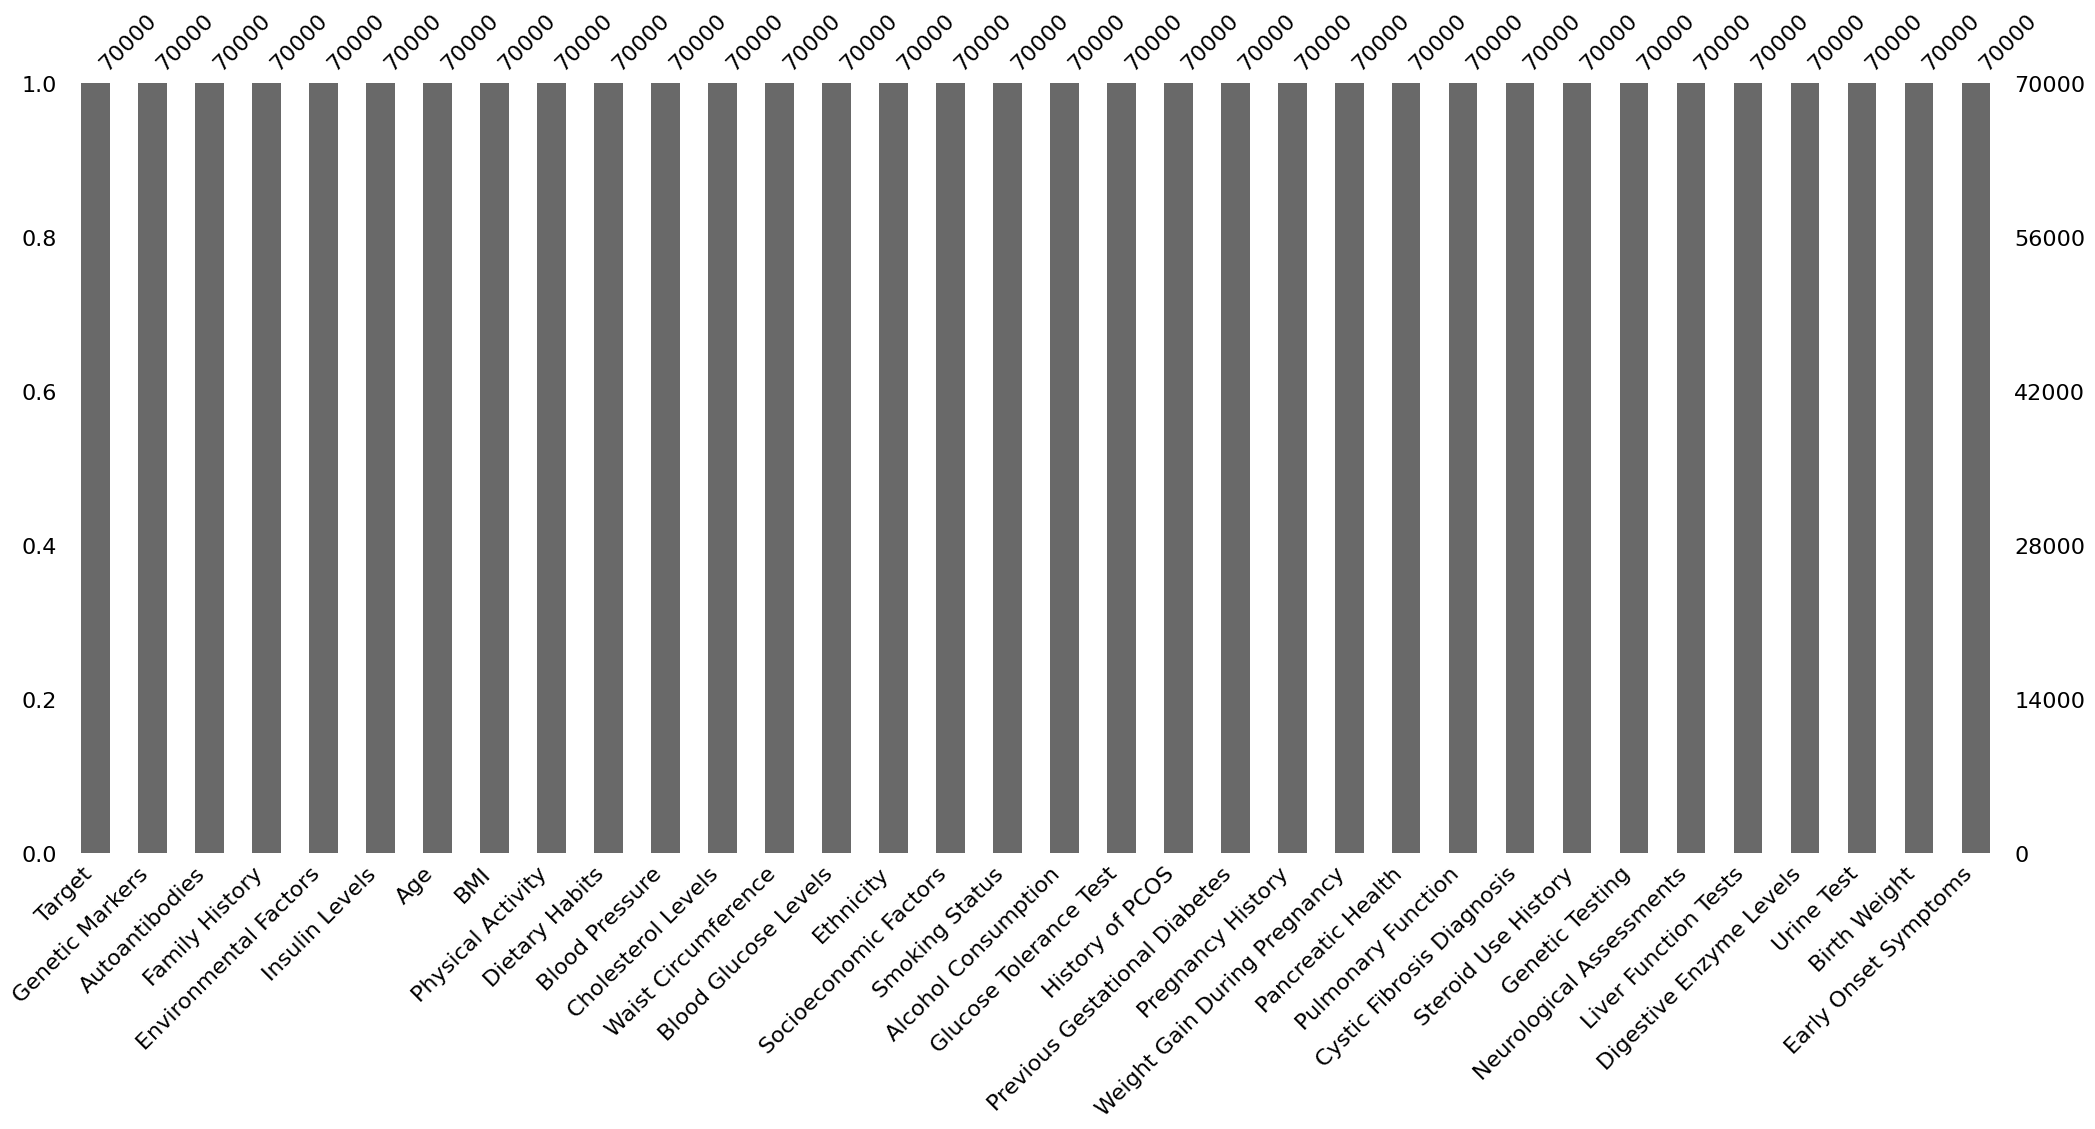

In [ ]:
msno.bar(df)

#Handling Numerical Variables

In [ ]:
numerical = ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
             'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy',
             'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments',
             'Digestive Enzyme Levels', 'Birth Weight']

cat_cols = ['Genetic Markers', 'Autoantibodies', 'Family History',
            'Environmental Factors', 'Physical Activity', 'Dietary Habits',
            'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
            'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
            'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis',
            'Steroid Use History', 'Genetic Testing', 'Liver Function Tests',
            'Urine Test', 'Early Onset Symptoms']


Dalam kode yang disediakan, terdapat pengelompokan variabel ke dalam dua kategori utama: `numerical (numerik)` dan `categorical (kategorik)`.

1. `Variabel Numerik` : biasanya berupa angka, bisa dalam bentuk integer maupun float
- *Insulin Levels* : Mengukur kadar insulin dalam darah.
- *Age*: Menunjukkan usia individu.
- *BMI (Body Mass Index)* : Menilai proporsi berat badan terhadap tinggi badan.
- *Blood Pressure* : Menunjukkan tekanan darah.
- *Cholesterol Levels* : Mengukur kadar kolesterol dalam tubuh.
- *Waist Circumference* : Menilai lingkar pinggang sebagai indikator lemak tubuh.
- *Blood Glucose Levels* : Mengukur kadar glukosa dalam darah.
- *Weight Gain During Pregnancy* : Mengukur kenaikan berat badan selama kehamilan.
- *Pancreatic Health* : Menilai kesehatan pankreas.
- *Pulmonary Function* : Mengukur kapasitas dan fungsi paru-paru.
- *Neurological Assessments* : Menilai fungsi sistem saraf.
- *Digestive Enzyme Levels* : Mengukur tingkat enzim pencernaan.
- *Birth Weight* : Berat bayi saat lahir.

2. `Variabel Kategorik` : berisi kategori atau label, biasanya tidak memiliki urutan numerik.
- *Target* : Variabel yang akan diprediksi, seperti diagnosis suatu penyakit.
- *Genetic Markers* : Penanda genetik yang menunjukkan predisposisi terhadap kondisi kesehatan.
- *Autoantibodies* : Antibodi yang berperan dalam penyakit autoimun.
- *Family History* : Riwayat kesehatan keluarga yang berpengaruh pada risiko penyakit.
- *Environmental Factors* : Faktor lingkungan yang mempengaruhi kesehatan.
- *Physical Activity* : Tingkat aktivitas fisik individu.
- *Dietary Habits* : Kebiasaan makan yang mempengaruhi kesehatan.
- *Ethnicity* : Etnisitas yang dapat berhubungan dengan predisposisi genetik.
- *Socioeconomic Factors* : Faktor sosial ekonomi yang mempengaruhi akses terhadap layanan kesehatan.
- *Smoking Status* : Status merokok individu.
- *Alcohol Consumption* : Tingkat konsumsi alkohol.
- *Glucose Tolerance Test* : Hasil tes untuk mengukur respons tubuh terhadap glukosa.
- *History of PCOS* : Riwayat sindrom ovarium polikistik.
- *Previous Gestational Diabetes* : Riwayat diabetes gestasional.
- *Pregnancy History* : Riwayat kehamilan.
- *Cystic Fibrosis Diagnosis* : Diagnosis fibrosis kistik.
- *Steroid Use History* : Riwayat penggunaan steroid.
- *Genetic Testing* : Pengujian genetik.
- *Liver Function Tests* : Tes untuk mengevaluasi fungsi hati.
- *Urine Test* : Tes urine untuk mendeteksi kondisi medis.
- *Early Onset Symptoms* : Gejala awal dari suatu penyakit.

#Analisis Data Ekplorasi (EDA)

Kode ini menggunakan `matplotlib` untuk menghasilkan histogram dari semua **variabel numerik** dalam dataframe `df`. Variabel dengan tipe data object tidak bisa ditampilkan karena kompilator tidak bisa membaca kode dalam bentuk teks, sehingga dibutuhkan penanganan yang berbeda.

Fungsi `df.hist()` menghasilkan histogram untuk setiap kolom numerik, dengan parameter `bins=50` yang mengatur jumlah interval dalam histogram, dan `figsize=(20,15)` untuk menentukan ukuran grafik yang lebih besar. Dan `plt.show()` digunakan untuk menampilkan grafik tersebut.

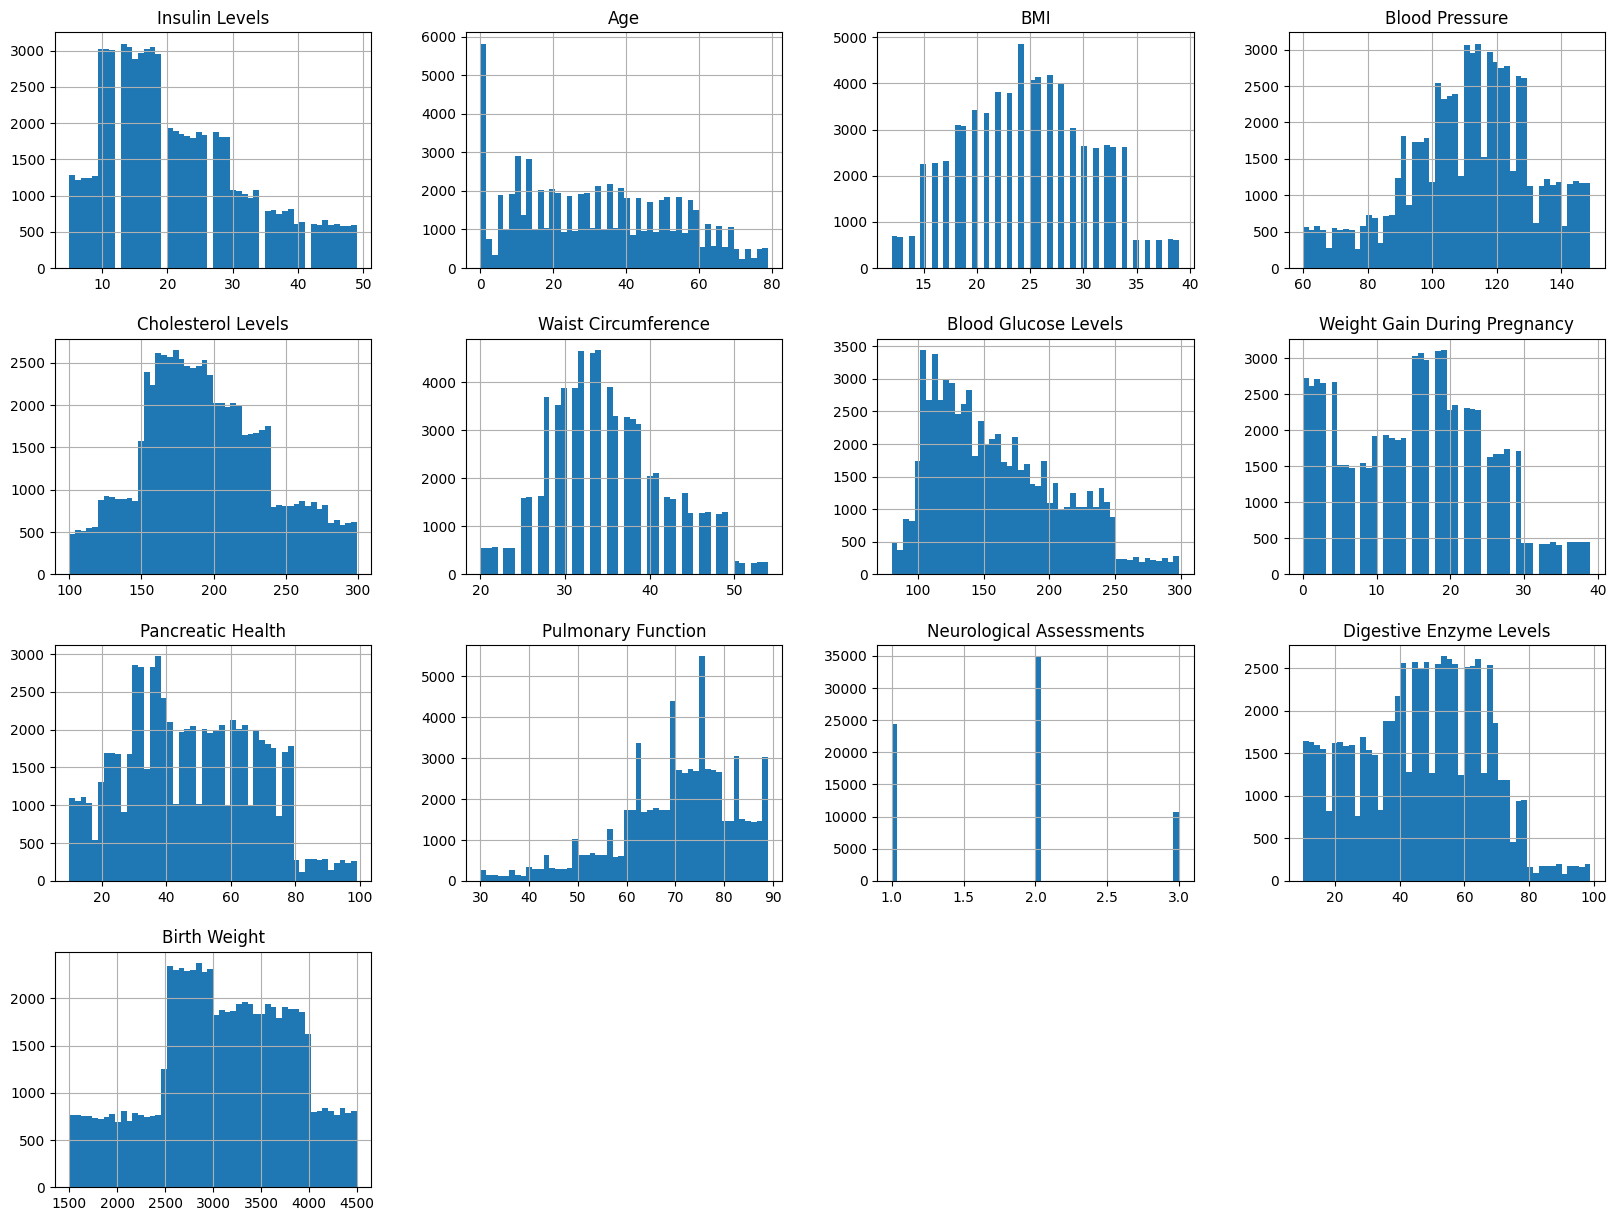

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot histogram of numerical variables
df.hist(bins=50, figsize=(20,15))
plt.show();

Tipe data `int64` dan `float64` dibuatkan suatu variabel baru dengan nama `numerical`

Dan didapatkan bahwa ada 13 columns numerical yang sesuai dengan penjelasan dalam `df.info` di atas. Kemudian dalam histogramnya terlihat masih ada beberapa data yang tidak berdistribusi normal dan memiliki outlier.

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns
len(numerical)

13

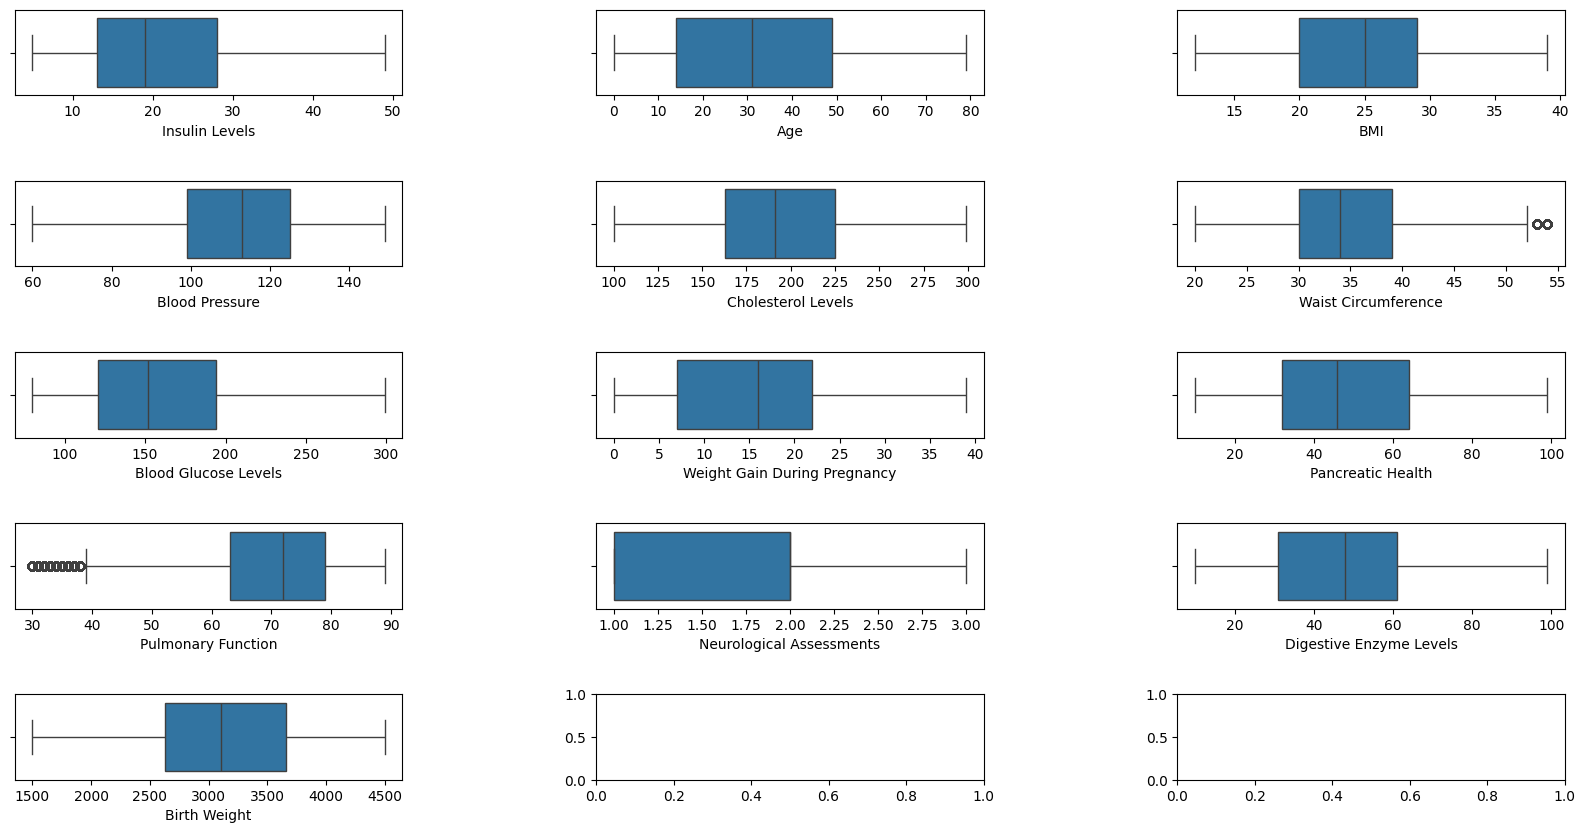

In [ ]:
#plot boxplot for each numerical variables

#plot numerical data (Classification Task)
# Plot KDE 1 Tiap Feature
numerical = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(5,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=df ,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

Untuk melihat distribusi data, kita menggunakan `histogram` dan `box-plot`untuk melihat apakah data numerik berdistribusi normal atau tidak, serta untuk mencari tau apakah data numerik memiliki outlier atau tidak.

`Outlier` seringkali merupakan indikasi kesalahan input data/ anomali, seperti kesalahan pengukuran, pencatatan, atau proses pengumpulan data yang salah. Jika data memiliki outlier kita harus menangani outlier karena dapat mempengaruhi hasil analisis dan model dengan cara yang tidak diinginkan.


1.   Mempengaruhi akurasi model
2.   Meningkatkan error dalam prediksi
3.   Mengacaukan distribusi data

`Distribusi Normal` : penanganan terhadap distribusi normal harus dilakukan karena jika tidak, data yang tidak berdistribusi normal dapat meningkatkan peluang terjadinya kesalahan tipe 1 (false positives); bisa menyebabkan hasil pengujian yang menyesatkan; kemudian juga karena dalam `Machine Learning`, dapat bekerja lebih baik dengan data yang terstandarisasi, sehingga bisa meningkatkan akurasi dan prediksi model.


**Membaca Grafik** :

`histogram` : Seperti pada kolom `Age` ada data yang memiliki nilai sangat tinggi dan berbeda dari yang lain, itu merupakan outlier; kemudian data juga masih tidak mengikuti distribusi normal.

 `box-plot`: Untuk melihat lebih jelasnya lagi pada column `Pulmonary FUnction`, `Waist Circumference` terdapat banyak outlier dan pendistribusian data tidak di tengah; Hal itu menyimpulkan bahwa data tidak berdistribusi normal.


# Handling Outlier

#Removing Outlier

In [ ]:
q1 = df['Pulmonary Function'].quantile(0.25)
q3 = df['Pulmonary Function'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q1 + 1.5*iqr
print(lower_bound)
print(upper_bound)

39.0
87.0


In [ ]:
q1 = df['Waist Circumference'].quantile(0.25)
q3 = df['Waist Circumference'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q1 + 1.5*iqr
print(lower_bound)
print(upper_bound)

16.5
43.5


In [ ]:
df[(df['Pulmonary Function'] >= lower_bound) & (df['Pulmonary Function'] <= upper_bound)]
df[(df['Waist Circumference'] >= lower_bound) & (df['Waist Circumference'] <= upper_bound)]

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,87,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,47,No,No,Positive,1,Normal,24,Protein Present,1770,No
5,LADA,Positive,Negative,Yes,Present,17,41,26,Moderate,Healthy,...,85,Yes,No,Negative,2,Normal,52,Ketones Present,3835,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,Wolcott-Rallison Syndrome,Positive,Negative,Yes,Absent,17,2,16,High,Unhealthy,...,60,No,No,Negative,1,Normal,22,Ketones Present,2578,Yes
69995,Steroid-Induced Diabetes,Negative,Negative,Yes,Present,24,38,35,High,Unhealthy,...,71,Yes,Yes,Positive,2,Abnormal,34,Normal,2575,No
69997,Type 1 Diabetes,Positive,Negative,No,Absent,18,11,15,Low,Unhealthy,...,77,Yes,Yes,Positive,2,Normal,53,Protein Present,3593,No
69998,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,No,Absent,32,30,24,High,Healthy,...,70,No,No,Positive,1,Abnormal,35,Ketones Present,2592,Yes


In [ ]:
from scipy.stats import mstats

# Lakukan winsorization untuk membatasi outlier
df['Pulmonary Function'] = mstats.winsorize(df['Pulmonary Function'], limits=[0.05, 0.05])
df['Waist Circumference'] = mstats.winsorize(df['Waist Circumference'], limits=[0.05, 0.05])


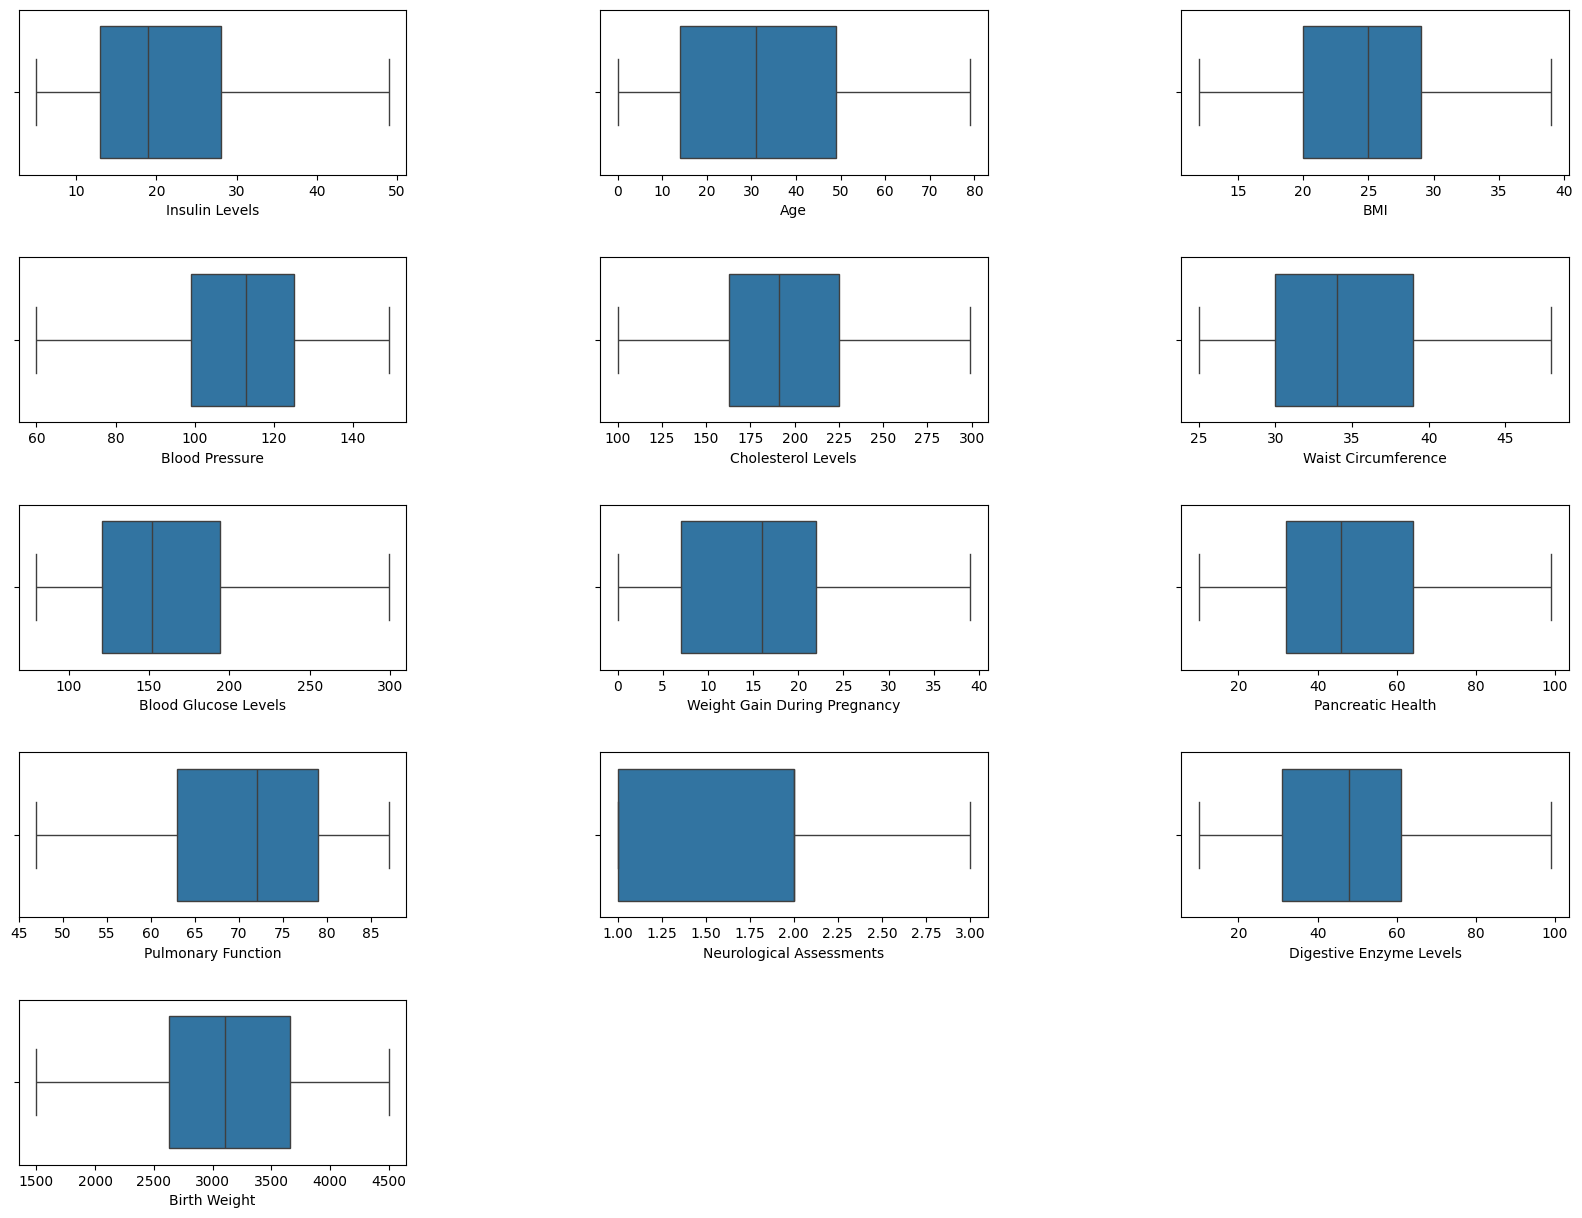

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List numerical columns (berdasarkan data yang diberikan)
numerical = ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
             'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy',
             'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments',
             'Digestive Enzyme Levels', 'Birth Weight']

# Tentukan jumlah subplot grid berdasarkan jumlah fitur
num_plots = len(numerical)  # Total plot (12)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Menghitung jumlah baris, sesuai jumlah fitur

# Buat figure dan axes untuk plotting
fig, axes = plt.subplots(rows, 3, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Pengaturan jarak antar plot

# Flatten the axes in case there are fewer plots than grid cells
axes = axes.flatten()  # Meratakan axes ke 1D agar lebih mudah diakses

# Plot boxplot untuk setiap variabel numerik
for i, item in enumerate(numerical):
    sns.boxplot(x=item, data=df, ax=axes[i])
    axes[i].set_ylabel("")  # Menghilangkan label y untuk lebih rapi

# Hapus axes yang kosong (jika ada lebih banyak grid daripada plot)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


Dari Boxplot diatas terlihat bahwa terdapat outlier pada variabel Pulmonary Function dan Waist Circumferences

Setelah dilakukan winsnorizing maka jumlah total data tetap 70.000,

dikarenakan `Winsorization` adalah teknik yang membatasi nilai ekstrim dalam dataset dengan menggantinya dengan nilai tertentu dari distribusi data. Dalam metode ini, nilai yang sangat rendah dan sangat tinggi (outlier) diganti dengan nilai tertentu (misalnya, nilai percentile tertentu).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

# Feature Engineering

#### Create New Feature

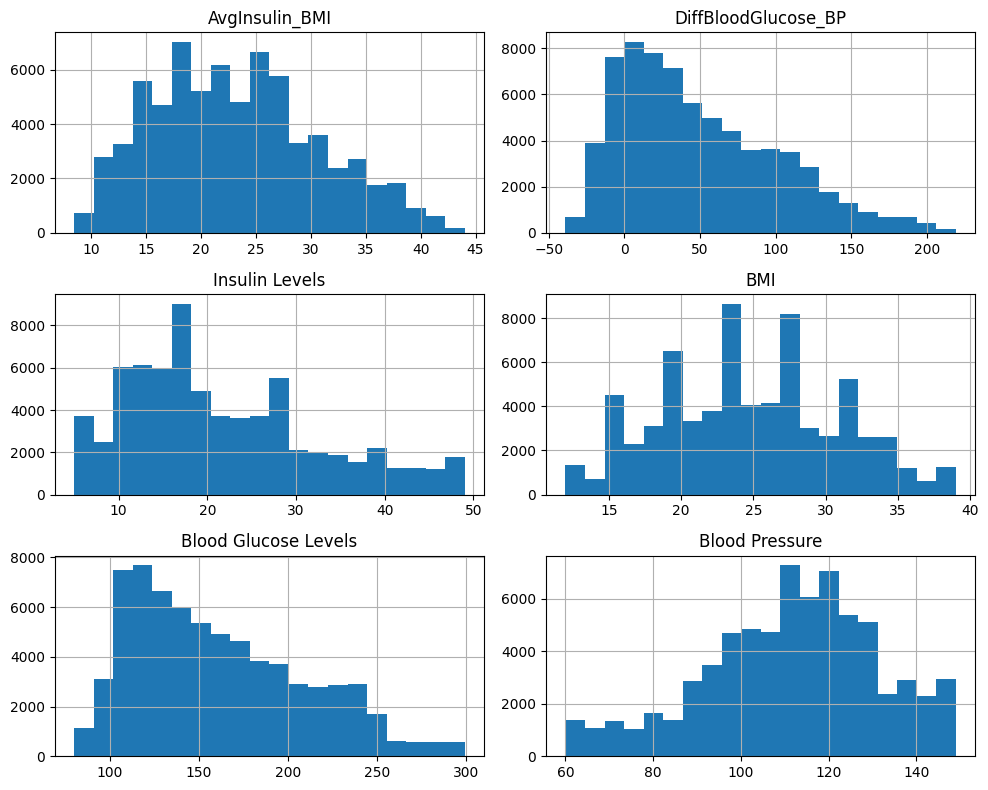

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create new feature columns by combining or manipulating existing ones
df['AvgInsulin_BMI'] = (df['Insulin Levels'] + df['BMI']) / 2
df['DiffBloodGlucose_BP'] = df['Blood Glucose Levels'] - df['Blood Pressure']

# Display histograms for these new features along with the original columns
df[['AvgInsulin_BMI', 'DiffBloodGlucose_BP', 'Insulin Levels', 'BMI', 'Blood Glucose Levels', 'Blood Pressure']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


**Interprestasi :**

1. AvgInsulin_BMI merupakan rata-rata dari level insulin dan BMI, yang memberikan pandangan mengenai hubungan antara kadar insulin dan indeks massa tubuh seseorang. Distribusinya menunjukkan mayoritas individu memiliki nilai antara 15 hingga 30, dengan sedikit penurunan pada nilai yang lebih tinggi. Ini mengindikasikan bahwa sebagian besar individu memiliki kadar insulin dan BMI dalam kisaran normal, dan hanya sedikit yang memiliki nilai ekstrem.  

2. DiffBloodGlucose_BP adalah selisih antara level glukosa darah dan tekanan darah. Histogram menunjukkan sebagian besar nilai selisih berada di antara 50 dan 150, yang berarti pada umumnya, kadar glukosa darah lebih tinggi daripada tekanan darah. Adanya beberapa nilai negatif menunjukkan bahwa dalam sebagian kecil kasus, tekanan darah lebih tinggi dibandingkan dengan glukosa darah, meskipun ini jarang terjadi.

3. Insulin Levels menunjukkan distribusi bimodal, yang mengindikasikan adanya dua kelompok utama dalam populasi: satu dengan level insulin yang rendah (sekitar 10) dan satu lagi dengan level insulin menengah hingga tinggi (sekitar 25). Hal ini mungkin mencerminkan adanya variasi dalam kesehatan metabolik populasi, di mana sebagian individu memiliki resistensi insulin atau kondisi terkait lainnya.

4. BMI memiliki puncak distribusi di sekitar 20 hingga 25, yang menunjukkan sebagian besar individu berada pada kisaran berat badan yang sehat. Namun, ada penurunan jumlah individu dengan BMI di atas 30, yang mengindikasikan obesitas. Distribusi ini mengungkapkan bahwa obesitas bukanlah masalah yang dominan dalam data ini, meskipun masih ada sebagian kecil populasi yang termasuk dalam kategori ini.

5. Blood Glucose Levels cenderung lebih tinggi daripada tekanan darah (Blood Pressure), dengan sebagian besar individu memiliki glukosa darah antara 100 hingga 200 dan tekanan darah berkisar antara 60 hingga 140. Distribusi tekanan darah yang lebar menunjukkan variasi yang lebih besar dalam kesehatan kardiovaskular populasi, sedangkan distribusi glukosa yang condong ke kiri mungkin menunjukkan beberapa individu dengan risiko diabetes atau kondisi pradiabetes.

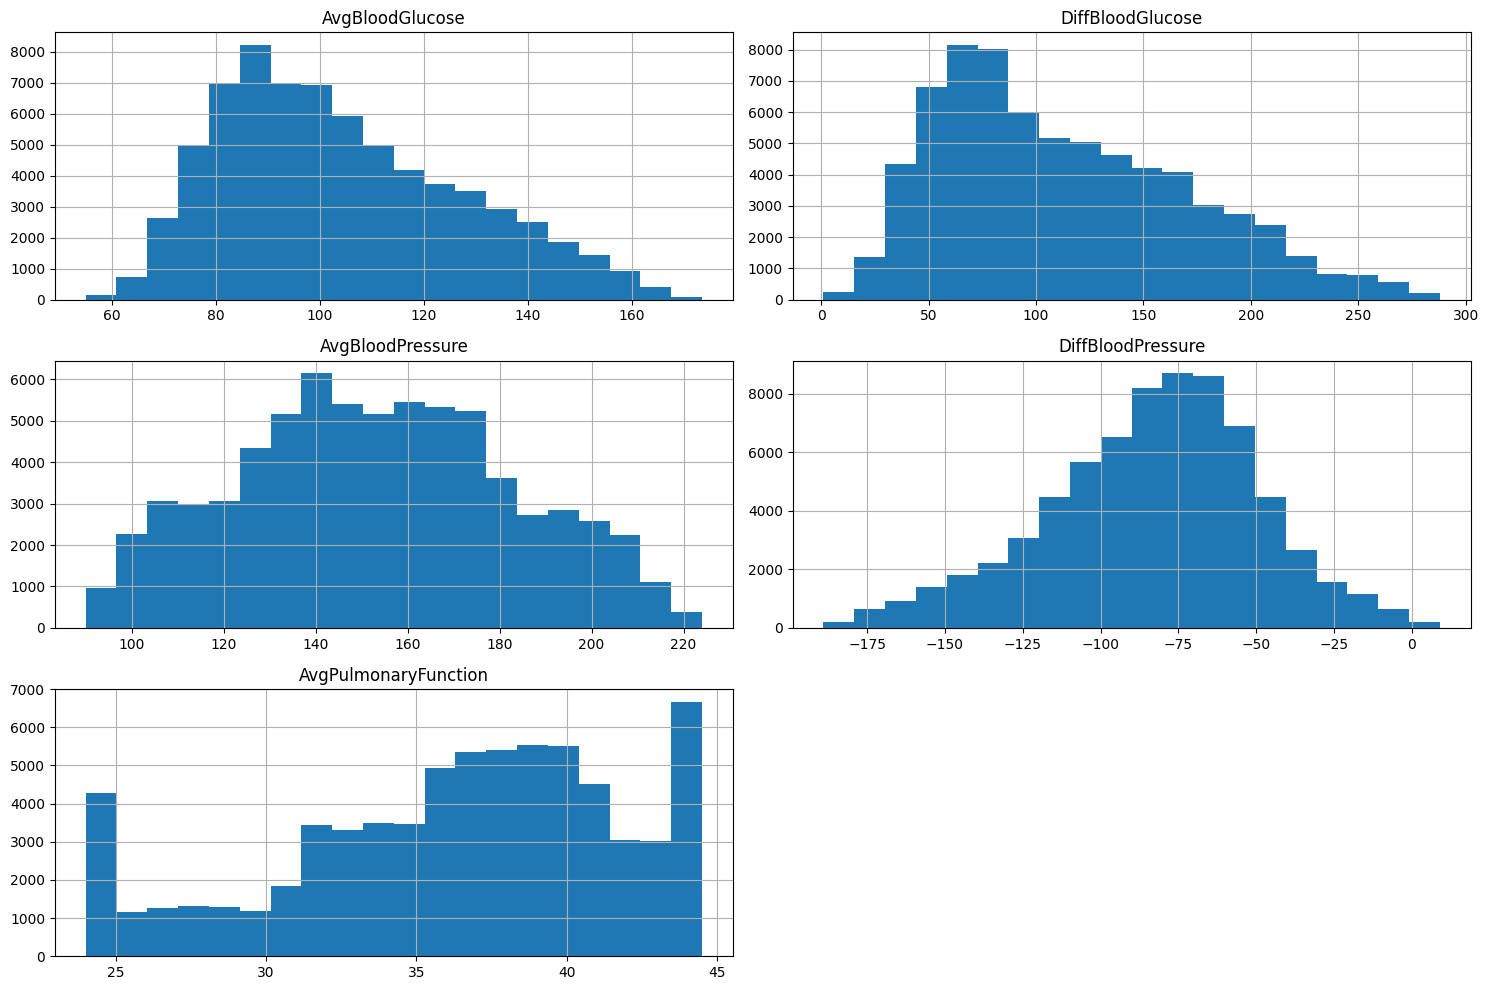

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create new features by combining the relevant columns

# Example calculations for averages and differences
df['AvgBloodGlucose'] = (df['Blood Glucose Levels'] + df['Pancreatic Health']) / 2
df['DiffBloodGlucose'] = df['Blood Glucose Levels'] - df['Pancreatic Health']

df['AvgBloodPressure'] = (df['Blood Pressure'] + df['Cholesterol Levels']) / 2
df['DiffBloodPressure'] = df['Blood Pressure'] - df['Cholesterol Levels']

df['AvgPulmonaryFunction'] = (df['Pulmonary Function'] + df['Neurological Assessments']) / 2
df['DiffPulmonaryFunction'] = df['Pulmonary Function'] - df['Neurological Assessments']

# Plot histograms for these new columns
df[['AvgBloodGlucose', 'DiffBloodGlucose', 'AvgBloodPressure', 'DiffBloodPressure', 'AvgPulmonaryFunction']].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


**Interprestasi :**

1. AvgBloodGlucose

Histogram pada grafik ini menunjukkan distribusi rata-rata kadar glukosa darah dan kesehatan pankreas. Mayoritas individu berada di kisaran antara 80 hingga 120, dengan puncak distribusi sekitar 100. Ini mengindikasikan bahwa sebagian besar individu memiliki kadar glukosa darah yang cukup normal, namun ada beberapa yang mengalami kadar lebih tinggi hingga sekitar 160.

2. DiffBloodGlucose

Histogram ini menggambarkan selisih antara kadar glukosa darah dan kesehatan pankreas. Distribusi menunjukkan sebagian besar perbedaan berada di kisaran 50 hingga 100, dengan sedikit distribusi yang meluas hingga 250. Ini menunjukkan bahwa pada kebanyakan kasus, kadar glukosa darah lebih tinggi daripada kesehatan pankreas, mungkin mencerminkan kondisi seperti resistensi insulin atau gangguan pankreas pada beberapa individu.

3. AvgBloodPressure

Histogram ini menunjukkan distribusi rata-rata antara tekanan darah dan kadar kolesterol. Mayoritas nilai berkisar antara 140 hingga 180, dengan puncak distribusi di sekitar 160. Hal ini menunjukkan bahwa tekanan darah individu cenderung meningkat ketika dikombinasikan dengan kolesterol, yang dapat mencerminkan faktor risiko terkait kardiovaskular.

4. DiffBloodPressure  

Histogram ini menggambarkan perbedaan antara tekanan darah dan kadar kolesterol. Distribusi sebagian besar berada pada nilai negatif, dengan puncak di sekitar -100 hingga -50. Ini berarti bahwa, dalam banyak kasus, kadar kolesterol lebih tinggi dibandingkan tekanan darah, yang mungkin merupakan indikasi gangguan kesehatan terkait kolesterol pada beberapa individu.

5. AvgPulmonaryFunction

Grafik ini menunjukkan distribusi rata-rata antara fungsi paru-paru dan penilaian neurologis. Sebagian besar nilai berada di kisaran 30 hingga 40, dengan beberapa lonjakan signifikan di sekitar nilai tersebut. Distribusi yang agak menyebar ini menunjukkan bahwa ada variasi yang cukup besar dalam fungsi paru-paru dan kondisi neurologis individu, dengan beberapa individu mungkin memiliki masalah dalam kedua area ini.

### Transformasi Fitur Numerik
- Standarisasi
- MinMax
- Standarisasi (Robust)
- Box-cox / YeoJohnson

#### MinMax Scaling

MinMax Scaling digunakan untuk transformasi fitur numerik. Dalam metode ini, data di-skala-kan sehingga nilai-nilai fitur berada dalam rentang tertentu, biasanya antara 0 dan 1. Teknik ini bermanfaat saat kita menginginkan semua fitur berada dalam rentang yang sama, tanpa mengubah distribusi data aslinya. Misalnya, fitur yang mewakili umur atau pendapatan bisa diperkecil dalam skala yang sama agar memiliki bobot yang seimbang dalam model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your original DataFrame is named df
df_scaled_minmax = df.copy()  # Create a copy of the original DataFrame

# Apply MinMaxScaler with the feature range (-1, 1) to selected columns
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled_minmax[['AvgBloodGlucose', 'AvgBloodPressure', 'AvgPulmonaryFunction']] = scaler.fit_transform(
    df[['AvgBloodGlucose', 'AvgBloodPressure', 'AvgPulmonaryFunction']]
)

# Display the first few rows of the scaled DataFrame
df_scaled_minmax.head()


,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Birth Weight,Early Onset Symptoms,AvgBloodGlucose,DiffBloodGlucose,AvgBloodPressure,DiffBloodPressure,AvgPulmonaryFunction,DiffPulmonaryFunction,AvgInsulin_BMI,DiffBloodGlucose_BP
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,2629,No,-0.206751,132,0.082090,-77,0.512195,73,39.0,44
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,1881,Yes,-0.206751,152,-0.895522,-48,-0.365854,59,15.0,105
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,3622,Yes,-0.569620,49,-0.059701,-64,0.609756,79,25.5,-16
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,3542,No,-0.493671,72,-0.470149,-51,1.000000,85,12.0,21
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,1770,No,0.594937,279,-0.485075,-43,-1.000000,46,17.0,186


In [ ]:
# df_cln[['AvgHumidity','AvgPressure']].hist(figsize = (15,2))
# plt.show()
# print(df_cln[['AvgHumidity','AvgPressure']].describe())
# df_tmp[['AvgHumidity','AvgPressure']].hist(figsize = (15,2))
# print(df_tmp[['AvgHumidity','AvgPressure']].describe())

### Transformasi Fitur Kategorik
- Ordinal Encoder
- OneHot Encoder
- Target Encoder

Dalam kasus ini column dengan tipe data object yang akan diubah hanya column `Target`saja agar bisa dilakukan modelling.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Fit dan transform target pada kolom 'Target' di dataframe df
df_scaled_minmax['Target'] = le.fit_transform(df_scaled_minmax['Target'])

# Print kolom Target setelah encoding
print(df_scaled_minmax['Target'])

0         7
1         4
2         5
3         8
4        12
         ..
69995     7
69996     2
69997     8
69998     0
69999     2
Name: Target, Length: 70000, dtype: int64


#Modelling

In [ ]:
df.Target.value_counts(normalize = True)

,proportion
Target,
MODY,0.079329
Secondary Diabetes,0.078271
Cystic Fibrosis-Related Diabetes (CFRD),0.078057
Type 1 Diabetes,0.077800
Neonatal Diabetes Mellitus (NDM),0.077257
Wolcott-Rallison Syndrome,0.077143
Type 2 Diabetes,0.077100
Prediabetic,0.076800
Gestational Diabetes,0.076343


1. **Regresi Logistik**

`Definisi` : Regresi logistik adalah model statistik yang digunakan untuk klasifikasi biner. Model ini memprediksi probabilitas dari kelas target berdasarkan satu atau lebih fitur.

`Cara Kerja` : Regresi logistik menggunakan fungsi sigmoid untuk mengubah output linear menjadi nilai probabilitas antara 0 dan 1. Jika probabilitas melebihi ambang batas (biasanya 0.5), model mengklasifikasikan data sebagai kelas positif.

`Kelebihan` : Sederhana dan mudah diinterpretasikan, baik untuk masalah klasifikasi dengan dua kelas.

`Kekurangan`: Tidak dapat menangkap hubungan non-linear secara langsung dan sensitivitas terhadap outlier.

2. **KNN**
`Definisi``: KNN adalah algoritma klasifikasi yang mengklasifikasikan data baru berdasarkan kedekatan (jarak) dengan titik data yang sudah ada di kelas yang sama.

`Cara Kerja` : Untuk mengklasifikasikan titik baru, KNN menghitung jarak antara titik tersebut dan titik-titik dalam dataset, kemudian memilih k titik terdekat. Kelas dari titik baru ditentukan oleh mayoritas kelas di antara k tetangga terdekat.

`Kelebihan` : Sederhana dan intuitif, dapat menangkap hubungan non-linear.

`Kekurangan` : Memerlukan banyak memori dan waktu untuk perhitungan jarak, performanya menurun dengan dimensi yang tinggi (curse of dimensionality).

3. **Random Forest**
`Definisi` : Random Forest adalah metode ensemble yang menggunakan banyak pohon keputusan untuk melakukan klasifikasi atau regresi.

`Cara Kerja` : Model ini membuat beberapa pohon keputusan berdasarkan subset acak dari data pelatihan dan fitur. Prediksi akhir diambil dari mayoritas suara (klasifikasi) atau rata-rata (regresi) dari semua pohon.

`Kelebihan` : Robust terhadap overfitting, menangani data yang hilang dengan baik, dan mampu menangkap interaksi antar fitur.

`Kekurangan` : Lebih kompleks dan sulit diinterpretasikan dibandingkan pohon keputusan tunggal, dan bisa memerlukan lebih banyak waktu komputasi.

4. **XGBoost (Extreme Gradient Boosting)**
`Definisi` : XGBoost adalah algoritma pembelajaran mesin berbasis pohon yang sangat efisien dan sering digunakan dalam kompetisi data.

`Cara Kerja` : Menggunakan teknik boosting, XGBoost membangun model dengan menggabungkan beberapa pohon keputusan secara bertahap. Setiap pohon baru fokus pada kesalahan yang dibuat oleh pohon sebelumnya, sehingga meningkatkan akurasi secara bertahap.

`Kelebihan` : Sangat efisien dan cepat, menangani data yang hilang dengan baik, dan sering kali memberikan hasil terbaik dalam kompetisi.
Kekurangan: Memerlukan penyesuaian hyperparameter yang lebih banyak untuk mencapai performa terbaik, dan bisa jadi lebih kompleks dalam implementasinya.

`Kekurangan` : Memerlukan penyesuaian hyperparameter yang lebih banyak untuk mencapai performa terbaik, dan bisa jadi lebih kompleks dalam implementasinya.

`shape_df`: Menunjukkan jumlah baris dan kolom dalam DataFrame.

In [ ]:
df.shape

(70000, 42)

Kolom yang tidak dibutuhkan untuk modelling dibuang, sehingga menyisakan 8 kolom baru saja.

Kemudian dibagi antara data training dan data testing sebagai berikut :

In [ ]:
from sklearn.model_selection import train_test_split

# Menghapus kolom 'Target' dari df_scaled
X = df_scaled_minmax.drop(columns= ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
             'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy',
             'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments',
             'Digestive Enzyme Levels', 'Birth Weight','Genetic Markers', 'Autoantibodies', 'Family History',
            'Environmental Factors', 'Physical Activity', 'Dietary Habits',
            'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
            'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
            'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis',
            'Steroid Use History', 'Genetic Testing', 'Liver Function Tests',
            'Urine Test', 'Early Onset Symptoms','Target'])  # Hapus kolom awal dari dataframe

y = df_scaled['Target']  # Ambil kolom Target dari dataframe asli (jika diperlukan)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print(X_train.shape)
print(X_test.shape)

(52500, 8)
(17500, 8)


**SMOTE** (Synthetic Minority Over-sampling Technique) untuk menangani masalah ketidakseimbangan kelas dalam dataset pelatihan.

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Lakukan resampling setelah y_train diubah menjadi numerik
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)


Untuk mengetahui kategori mana yang akan dilakukan untuk modelling, maka bisa dilihat di bawah :

In [ ]:
print(X_train.dtypes)  # Cek tipe data untuk setiap kolom di X_train
X.info()


AvgBloodGlucose          float64
DiffBloodGlucose           int64
AvgBloodPressure         float64
DiffBloodPressure          int64
AvgPulmonaryFunction     float64
DiffPulmonaryFunction      int64
AvgInsulin_BMI           float64
DiffBloodGlucose_BP        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AvgBloodGlucose        70000 non-null  float64
 1   DiffBloodGlucose       70000 non-null  int64  
 2   AvgBloodPressure       70000 non-null  float64
 3   DiffBloodPressure      70000 non-null  int64  
 4   AvgPulmonaryFunction   70000 non-null  float64
 5   DiffPulmonaryFunction  70000 non-null  int64  
 6   AvgInsulin_BMI         70000 non-null  float64
 7   DiffBloodGlucose_BP    70000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 4.3 MB


#Logistic Reggresion

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.4305333333333333
0.43028571428571427


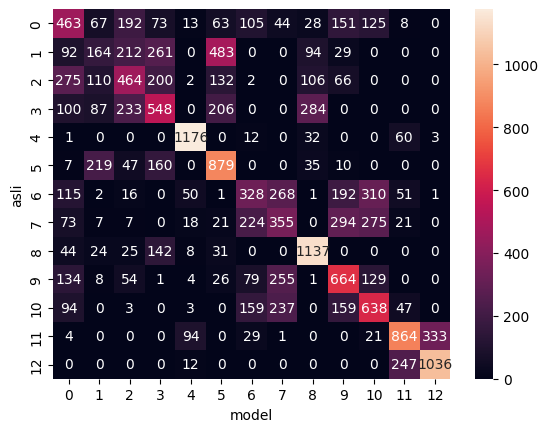

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('model')
plt.ylabel('asli')
plt.show()

In [ ]:
lr.predict(X_test)

array([10,  7,  7, ...,  2,  8,  2])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34      1332
           1       0.24      0.12      0.16      1335
           2       0.37      0.34      0.36      1357
           3       0.40      0.38      0.39      1458
           4       0.85      0.92      0.88      1284
           5       0.48      0.65      0.55      1357
           6       0.35      0.25      0.29      1335
           7       0.31      0.27      0.29      1295
           8       0.66      0.81      0.73      1411
           9       0.42      0.49      0.45      1355
          10       0.43      0.48      0.45      1340
          11       0.67      0.64      0.65      1346
          12       0.75      0.80      0.78      1295

    accuracy                           0.50     17500
   macro avg       0.48      0.50      0.49     17500
weighted avg       0.48      0.50      0.48     17500



Didapatkan bahwa akurasi sebesar 0,50 atau hanya sebesar 50%

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1332
           1       0.29      0.33      0.31      1335
           2       0.40      0.37      0.38      1357
           3       0.39      0.38      0.39      1458
           4       0.89      0.96      0.92      1284
           5       0.50      0.57      0.53      1357
           6       0.31      0.30      0.30      1335
           7       0.30      0.30      0.30      1295
           8       0.71      0.70      0.70      1411
           9       0.44      0.38      0.41      1355
          10       0.44      0.39      0.41      1340
          11       0.71      0.67      0.69      1346
          12       0.74      0.75      0.75      1295

    accuracy                           0.51     17500
   macro avg       0.51      0.51      0.51     17500
weighted avg       0.51      0.51      0.51     17500



Didapatkan bahwa akurasi sebesar 0,51 atau hanya sebesar 51%

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.8652    0.6652    0.7521      1332
           1     0.5388    0.4472    0.4887      1335
           2     0.6390    0.5777    0.6068      1357
           3     0.6355    0.6674    0.6511      1458
           4     0.9869    0.9984    0.9926      1284
           5     0.6721    0.9079    0.7724      1357
           6     0.5171    0.3738    0.4339      1335
           7     0.3575    0.2548    0.2976      1295
           8     0.7568    0.8490    0.8003      1411
           9     0.5000    0.5838    0.5386      1355
          10     0.5045    0.6754    0.5775      1340
          11     0.8117    0.8009    0.8063      1346
          12     0.8074    0.8124    0.8099      1295

    accuracy                         0.6633     17500
   macro avg     0.6610    0.6626    0.6560     17500
weighted avg     0.6604    0.6633    0.6561     17500



Didapatkan bahwa akurasi sebesar 0,66 atau hanya sebesar 66%




#XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train_resample,y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.8983    0.6764    0.7717      1332
           1     0.5543    0.4472    0.4950      1335
           2     0.6479    0.5763    0.6100      1357
           3     0.6550    0.6536    0.6543      1458
           4     0.9977    1.0000    0.9988      1284
           5     0.6751    0.9477    0.7885      1357
           6     0.5532    0.3116    0.3987      1335
           7     0.3937    0.2602    0.3133      1295
           8     0.7421    0.8689    0.8005      1411
           9     0.5088    0.5771    0.5408      1355
          10     0.4967    0.7881    0.6093      1340
          11     0.7991    0.7860    0.7925      1346
          12     0.7847    0.7992    0.7919      1295

    accuracy                         0.6693     17500
   macro avg     0.6697    0.6686    0.6589     17500
weighted avg     0.6691    0.6693    0.6590     17500



In [ ]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.8983    0.6764    0.7717      1332
           1     0.5543    0.4472    0.4950      1335
           2     0.6479    0.5763    0.6100      1357
           3     0.6550    0.6536    0.6543      1458
           4     0.9977    1.0000    0.9988      1284
           5     0.6751    0.9477    0.7885      1357
           6     0.5532    0.3116    0.3987      1335
           7     0.3937    0.2602    0.3133      1295
           8     0.7421    0.8689    0.8005      1411
           9     0.5088    0.5771    0.5408      1355
          10     0.4967    0.7881    0.6093      1340
          11     0.7991    0.7860    0.7925      1346
          12     0.7847    0.7992    0.7919      1295

    accuracy                         0.6693     17500
   macro avg     0.6697    0.6686    0.6589     17500
weighted avg     0.6691    0.6693    0.6590     17500



Didapatkan bahwa akurasi sebesar 0,67 atau sebesar 67%. Dikarenakan akurasi tertinggi menggunakan XGBoost dan tidak adanya overfitting, dibuktikan dengan samanya nilai akurasi antara data training dengan data testing, maka disimpulkan bahwa model terbaiknya adalah **XGBoost**.

Di saat handling outlier, digunakan `winsnorizing` dan bukan menghilangkan data, hal ini dipilih karena banyaknya outlier memungkinkan bahwa terdapat informasi penting dalam outlier itu, walaupun menyebabkan akurasi model hanya sebesar 67%. Menghilangkan outlier dianggap beresiko karena bisa saja terjadi suatu hal yang tidak diprediksi sebelumnya ataupun fenomena yang bisa memberikan informasi yang lebih penting daripada sekedar mencari akurasi model yang lebih baik.